In [16]:
from sklearn.preprocessing import StandardScaler
from sail.models.torch.tcn import TCNRegressor
import numpy as np
import torch
from sklearn.datasets import make_regression

In [17]:
# Create data as we do in tests
def regression_data(n_samples, n_features):
    X, y = make_regression(n_samples, n_features, n_informative=10, bias=0, random_state=0)
    X, y = X.astype(np.float32), y.astype(np.float32).reshape(-1, 1)
    Xt = StandardScaler().fit_transform(X)
    yt = StandardScaler().fit_transform(y)
    return Xt, yt

In [31]:
# Set size of data
n_samples = 1000
n_features = 12
batch_size = 20

# Get regression data
X, y = regression_data(n_samples, n_features)

# Add dummy axis, as net requires it
X = X[:, :, np.newaxis]

# Initialize network as TCNRegressor
learner_tcn = TCNRegressor(n_features, 1)

# Calculate epochs as even divisor of n_samples and batch_size for sake of easiness
epochs = n_samples // batch_size
for i in range(epochs):
    # Extract X and y values of batch_size from training set
    X_step = X[i*batch_size:(i+1)*batch_size, :, :]
    y_step = y[i*batch_size:(i+1)*batch_size]
    
    # Run partial fit
    learner_tcn.partial_fit(X_step, y_step)

# Run prediction (note: this is of course the data that we trained on, but only for convenience sake; we are just testing if partial_fit works)
y_prediction = learner_tcn.predict(X)

  epoch    train_loss     dur
-------  ------------  ------
      1        1.3155  0.0156
      2        1.5358  0.0144
      3        0.9629  0.0137
      4        0.9524  0.0119
      5        0.9527  0.0112
      6        0.8183  0.0115
      7        0.6514  0.0119
      8        0.6874  0.0117
      9        0.8283  0.0112
     10        0.6618  0.0125


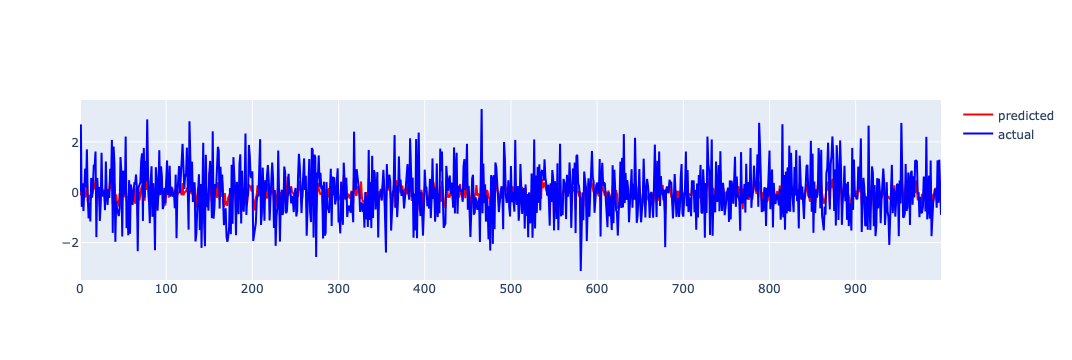

In [33]:
# Plot the
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'vscode'

y_pred = y_prediction.flatten().tolist()
y_true = y.flatten().tolist()
x = np.arange(len(y_true))
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y_pred, name='predicted',
                         line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=x, y=y_true, name='actual',
                         line=dict(color='blue', width=2)))
fig.show()